![""](https://geopandas.org/en/stable/_images/geopandas_logo_green.png)

# Función .dissolve() y .explode()

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon

In [ ]:
municipios = gpd.read_file(r'C:\CODE\Python\Py_Geoespacial\Municipios\mun.gpkg')

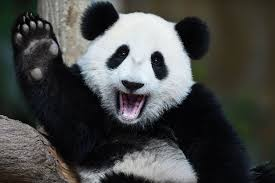

## ¿Que es un Polygon?

Polygon” o “Multipolygon” son tipos de geometrias usadas por sistemas GIS (Geographic information systems) y que usamos como una clase para almacenar las geometrias de un territorio

Un polygon es una geometria cerrada de almenos 3 puntos  y un multipolygon es una conjunto de multiples polygons

## Función Explode

![""](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcqV3-MkiMjhWiq_mDWD30VWm-pKrGbM5d-A&s)

- Separa geometrías compuestas: Convierte un MultiPolygon o MultiLineString en múltiples filas, una por cada parte.
- Mantiene atributos originales: Duplica los datos de las columnas para cada nueva fila generada.
- Útil para análisis detallado: Permite tratar cada subgeometría de forma independiente.

# Ejemplo de .explode()

<class 'shapely.geometry.multipolygon.MultiPolygon'>


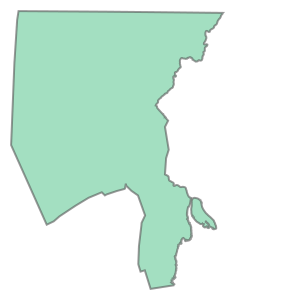

In [11]:
mexicali = municipios[municipios['CVEGEO'] == '02002']

print(type(municipios.geometry[14]))
municipios.geometry[14] 

In [12]:
print("Antes de .explode():")
print(mexicali)

Antes de .explode():
   CVEGEO CVE_ENT CVE_MUN    NOMGEO  POB  \
14  02002      02     002  Mexicali   26   

                                             geometry  
14  MULTIPOLYGON (((1288348.994 2246381.522, 12884...  


In [21]:
mexicali_exploded = mexicali.explode(index_parts=True).reset_index(drop=True)
print(mexicali_exploded.head())

  CVEGEO CVE_ENT CVE_MUN    NOMGEO  POB  \
0  02002      02     002  Mexicali   26   
1  02002      02     002  Mexicali   26   

                                            geometry  
0  POLYGON ((1288348.994 2246381.522, 1288458.873...  
1  POLYGON ((1218979.96 2348837.832, 1221251.465 ...  


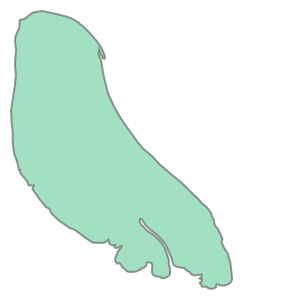

In [19]:
mexicali_exploded.geometry[0]

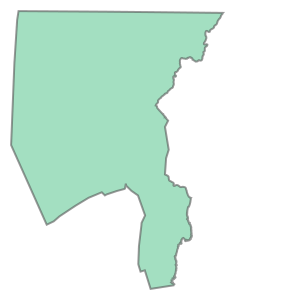

In [20]:
mexicali_exploded.geometry[1]

## Función Dissolve

![""](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLOT39FIIwcz7VfwE8d17ZR6fc_UqWAmyaNw&s)

- Agrupa por una columna: Fusiona geometrías que comparten un valor en una columna específica.
- Suma o agrega datos: Puede combinar atributos numéricos (como población) al fusionar geometrías.
- Crea entidades más grandes: Útil para unir regiones en una sola forma, como países en continentes. 

# Ejemplo con .dissolve()

In [23]:
mexicali_dissolved = mexicali_exploded.dissolve(by='CVEGEO')
print(mexicali_dissolved.head())

                                                 geometry CVE_ENT CVE_MUN  \
CVEGEO                                                                      
02002   MULTIPOLYGON (((1288458.873 2246171.545, 12885...      02     002   

          NOMGEO  POB  
CVEGEO                 
02002   Mexicali   26  


c:\CODE\Python\Py_Geoespacial\.venv\Lib\site-packages\geopandas\geoseries.py:720: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)


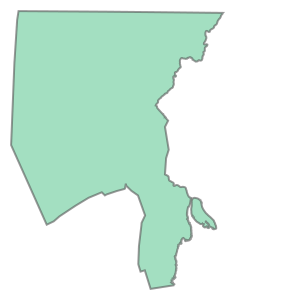

In [27]:
mexicali_dissolved.geometry[0]